In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [44]:
df = pd.read_csv('data/car_price_dataset.csv')

In [45]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [47]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [48]:
df['Mileage'].describe()

count     10000.000000
mean     149239.111800
std       86322.348957
min          25.000000
25%       74649.250000
50%      149587.000000
75%      223577.500000
max      299947.000000
Name: Mileage, dtype: float64

In [119]:
scaler = MinMaxScaler()

df['Norm_Mileage'] = scaler.fit_transform(df[['Mileage']]).round(4)
df['Norm_Year'] = scaler.fit_transform(df[['Year']]).round(4)
df['Norm_Eng'] = scaler.fit_transform(df[['Engine_Size']]).round(4)
df['Norm_Owner'] = scaler.fit_transform(df[['Owner_Count']]).round(4)
df['Norm_Doors'] = scaler.fit_transform(df[['Doors']]).round(4)
df
#df['Mileage'] = (df['Mileage'] - df['Mileage'].min()) / (df['Mileage'].max() - df['Mileage'].min())
#Normalization method

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Norm_Mileage,Norm_Year,Norm_Eng,Norm_Owner,Norm_Doors
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,0.9666,0.8696,0.800,1.00,0.3333
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,0.0178,0.5217,0.250,0.50,0.0000
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,0.7716,0.8696,0.800,0.25,0.6667
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,0.5366,1.0000,0.250,0.00,0.0000
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,0.9556,0.1304,0.400,0.50,0.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,0.0192,0.1739,0.675,0.75,0.0000
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,0.5601,0.0870,0.100,0.00,0.0000
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,0.2889,0.4348,0.500,0.00,1.0000
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,0.7527,0.0870,0.100,0.00,0.6667


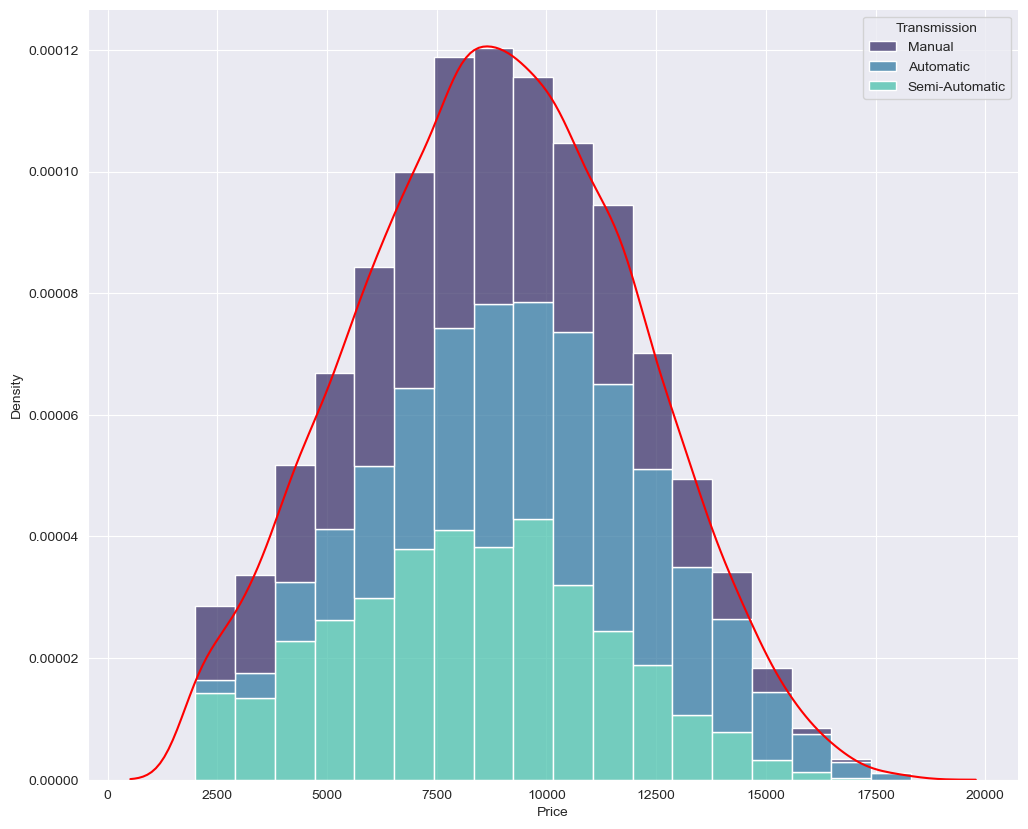

In [120]:
#What else can I add to this graph?
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
sns.despine()

sns.histplot(
    x=df['Price'],
    hue=df['Transmission'],
    binwidth=df['Price'].max()/20,
    palette='mako',
    multiple='stack',
    stat='density'
)

sns.kdeplot(
    data = df,
    x='Price',
    color='red'
)

plt.show()

In [121]:
labels = df['Brand'].unique()

In [122]:
labels

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [123]:
BrandDivided = {c : df[df['Brand']==c] for c in df['Brand'].unique()}
nBrandDivided = []
for k, i in BrandDivided.items():
    nBrandDivided.append(i['Price'])

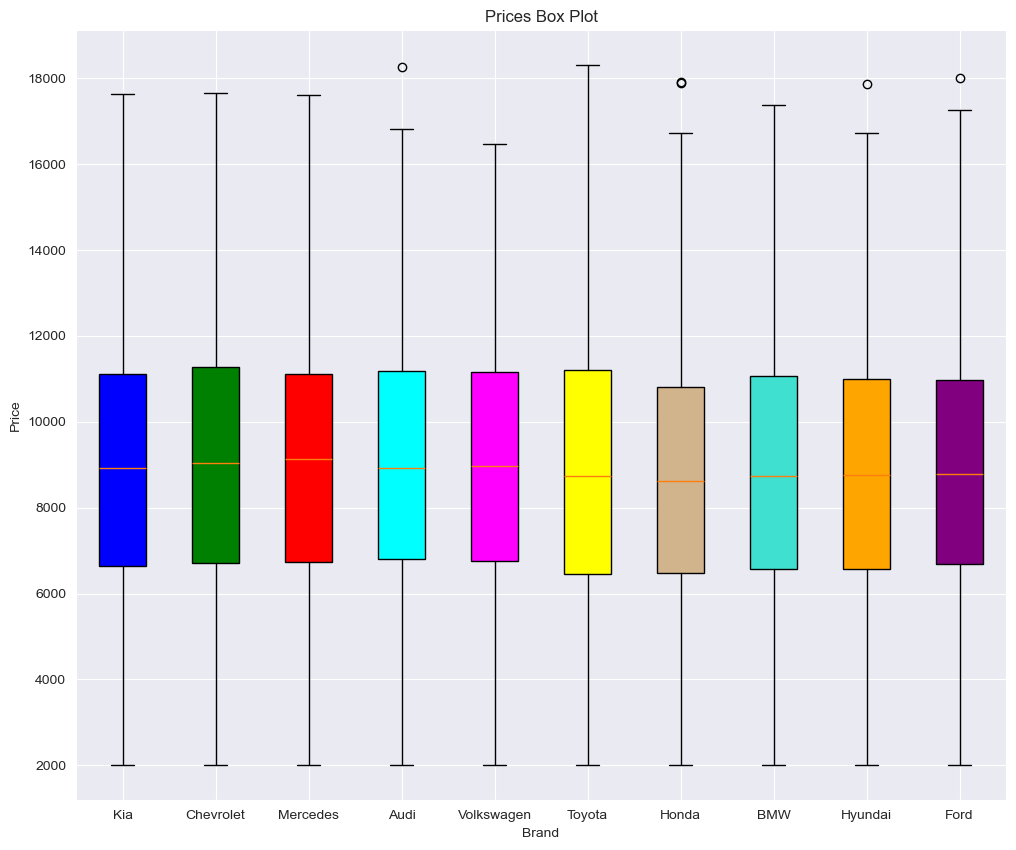

In [124]:
#I can still improve this graph
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
ax.set_title('Prices Box Plot')
bplot = ax.boxplot(nBrandDivided,
           patch_artist=True,
           tick_labels=labels
           )
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "tan", "turquoise", "orange", "purple"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [125]:
x=df['Year'].unique()
y = [3,2,1]
y.sort()
print(y)

[1, 2, 3]


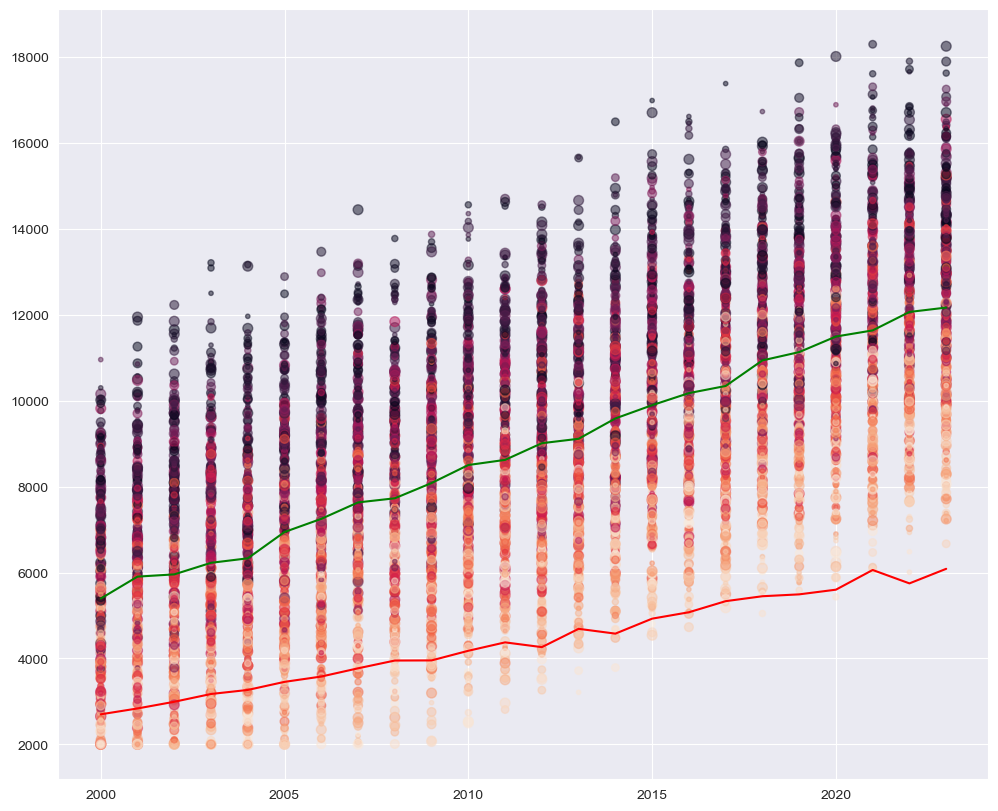

In [129]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
years = df['Year'].unique()
mean_price_per_year = df[['Year', 'Price']].groupby(['Year']).mean().reset_index()['Price']
mean_miles_car_age = df[['Year', 'Norm_Mileage', 'Price']].groupby(['Year']).mean().reset_index()['Norm_Mileage']
years.sort()
ax.scatter(x=df['Year'], y=df['Price'], s=df['Owner_Count']*10, c=df['Norm_Mileage'], alpha=0.5)
ax.plot(years, mean_price_per_year, color='green')
ax.plot(years, mean_miles_car_age*mean_price_per_year, color='red') #I need to find a way to show how badly mileage affects price in a car
plt.show()

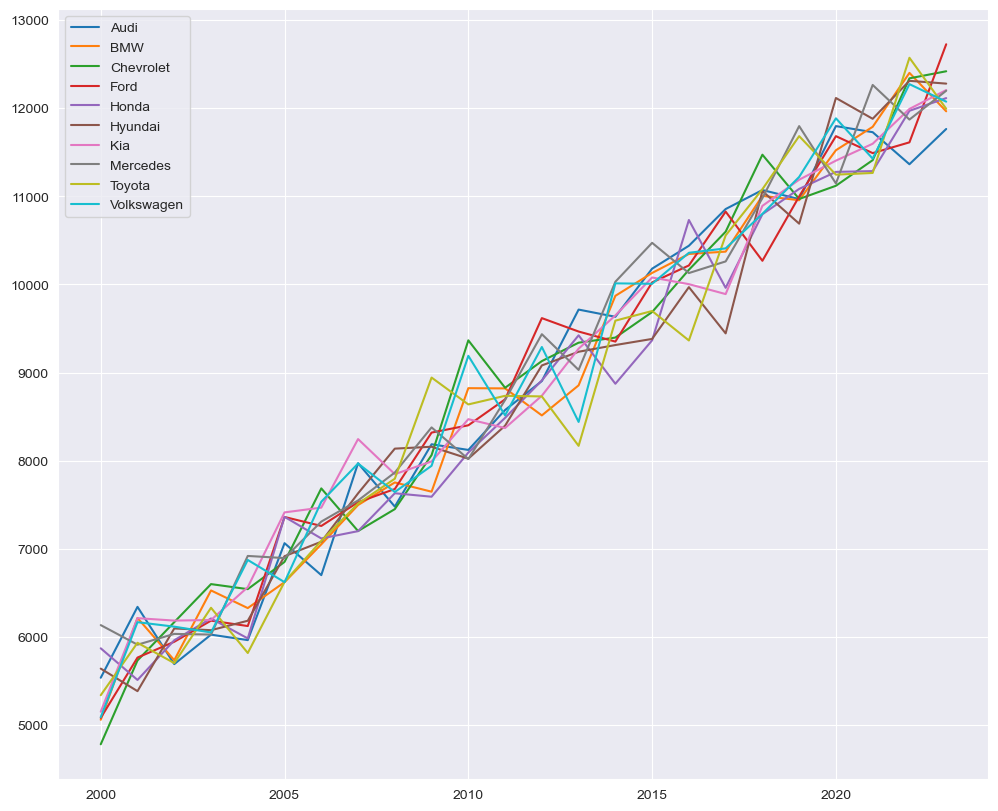

In [127]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
x = df[['Price', 'Brand', 'Year']].groupby(['Year', 'Brand']).mean()
x = x.reset_index() #Will undo the indexing cause by groupby where the columns names become the index for the rest of values.
for b in x['Brand'].unique():
    ax.plot(x[x['Brand'] == b]['Year'], x[x['Brand'] == b]['Price'], label=b)
ax.legend(loc='upper left')
plt.show()